## This section starts us off (api query and processing) 
* This section loops through 5 dates and gets the hrly temp, humidity and wind_speed for 5 days

In [1]:
'''
The new goal of my project is to: calculate the average temp in manchester over the last 5 days and graph it
'''
# unix time calculator -0> https://www.vultr.com/resources/unix-time-calculator/?convert=date&date_day=27&date_month=10&date_year=2021&date_hour=12&date_minute=00&date_second=00&date_tz_from=UTC&date_tz_to=UTC&date_format=Y-m-d+H%3Ai%3As

import requests, json, datetime, pandas as pd

df_final = pd.DataFrame(columns=['dt', 'temp', 'humidity', 'wind_speed']) # inititalisation of final dataframe
last_5_days = []

for x in range(0,5): # gets current date and time delta in unixtime
    unix_date_time = (datetime.datetime.today() - datetime.timedelta(x)).strftime("%s") 
    last_5_days.append(unix_date_time)




### Manchester dataframe processing

* this gets all the data for the city of manchester, condences it to what we care about and puts it in a dataframe

In [2]:
df_final_manchester = pd.DataFrame(columns=['dt', 'temp', 'humidity', 'wind_speed']) # inititalisation of final dataframe

for day in last_5_days: # gets the json from the api, processes it into a df and appends it to the final frame. ownly takes 4 columbs
    response_manchester = requests.get("http://api.openweathermap.org/data/2.5/onecall/timemachine?lat=42.9956&lon=-71.4548&dt="+ day +"&appid=fd3ef9b217de69f13fde1bd0325da289")
    
    processed_responce_manchester = response_manchester.json() # gets json
    
    df_raw_manchester = pd.DataFrame(processed_responce_manchester['hourly']) # json -> df from the "hourly" list
    
    df_processed_manchester = df_raw_manchester[["dt","temp", "humidity", "wind_speed"]].copy() # cuts df down to what we want ownly
    
    df_final_manchester = df_final_manchester.append(df_processed_manchester) # appends to the final df

df_final_manchester.insert(loc=len(df_final_manchester.columns), column='city', value='Manchester')

df_final_manchester['id'] = df_final_manchester[['dt', 'temp', 'humidity', 'wind_speed',]].sum(axis=1).map(hash)

df_final_manchester#.shape 

,dt,temp,humidity,wind_speed,city,id
0,1638403200,273.45,77,0.45,Manchester,2075258929833053662
1,1638406800,273.92,75,0.89,Manchester,1867733256915917805
0,1638316800,273.49,72,0.45,Manchester,2167492562240584793
1,1638320400,273.66,73,0.45,Manchester,253643040515082859
2,1638324000,273.68,76,2.04,Manchester,1660207034242881663
...,...,...,...,...,...,...
19,1638126000,274.37,53,0.89,Manchester,599519162043454200
20,1638129600,274.19,58,0.00,Manchester,438110305330127116
21,1638133200,273.96,62,0.00,Manchester,2213609378444209951
22,1638136800,273.10,68,0.82,Manchester,2121375196280782133


### Concord data processing

* this gets all the data for the city of concord, condences it to what we care about and puts it in a dataframe

In [3]:
df_final_concord = pd.DataFrame(columns=['dt', 'temp', 'humidity', 'wind_speed']) # inititalisation of final dataframe

for day in last_5_days: # gets the json from the api, processes it into a df and appends it to the final frame. ownly takes 4 columbs
    response_concord = requests.get("http://api.openweathermap.org/data/2.5/onecall/timemachine?lat=43.2081&lon=-71.5376&dt="+ day +"&appid=fd3ef9b217de69f13fde1bd0325da289")
    
    processed_responce_concord = response_concord.json() # gets json
    
    df_raw_concord = pd.DataFrame(processed_responce_concord['hourly']) # json -> df from the "hourly" list
    
    df_processed_concord = df_raw_concord[["dt","temp", "humidity", "wind_speed"]].copy() # cuts df down to what we want ownly
    
    df_final_concord = df_final_concord.append(df_processed_concord) # appends to the final df

df_final_concord.insert(loc=len(df_final_concord.columns), column='city', value='Concord')

df_final_concord['id'] = df_final_concord[['dt', 'temp', 'humidity', 'wind_speed',]].sum(axis=1).map(hash)

df_final_concord #.shape 

,dt,temp,humidity,wind_speed,city,id
0,1638403200,272.80,77,0.00,Concord,1844674299058195933
1,1638406800,272.96,77,1.54,Concord,1152921506245254127
0,1638316800,273.43,75,1.54,Concord,2236667786546297949
1,1638320400,273.84,74,1.54,Concord,876220059266501229
2,1638324000,273.64,77,1.54,Concord,415051897228417152
...,...,...,...,...,...,...
19,1638126000,273.88,50,2.57,Concord,1037629465735451382
20,1638129600,273.88,53,2.06,Concord,2167492562240397576
21,1638133200,273.18,57,0.00,Concord,415051897228226330
22,1638136800,272.36,65,0.00,Concord,830103243062508849


## Keen data processing
* this gets all the data for the city of Keen, condences it to what we care about and puts it in a dataframe

In [4]:
df_final_keen = pd.DataFrame(columns=['dt', 'temp', 'humidity', 'wind_speed']) # inititalisation of final dataframe

for day in last_5_days: # gets the json from the api, processes it into a df and appends it to the final frame. ownly takes 4 columbs
    response_keen = requests.get("http://api.openweathermap.org/data/2.5/onecall/timemachine?lat=41.5929&lon=-75.3738&dt="+ day +"&appid=fd3ef9b217de69f13fde1bd0325da289")
    
    processed_responce_keen = response_keen.json() # gets json
    
    df_raw_keen = pd.DataFrame(processed_responce_keen['hourly']) # json -> df from the "hourly" list
    
    df_processed_keen = df_raw_keen[["dt","temp", "humidity", "wind_speed"]].copy() # cuts df down to what we want ownly
    
    df_final_keen = df_final_keen.append(df_processed_keen) # appends to the final df

df_final_keen.insert(loc=len(df_final_keen.columns), column='city', value='keen')

#df_final_keen['id'].apply(lambda x : df_final_keen[x] = hash)

#df['a'] = df['a'].apply(lambda x: x + 1)

df_final_keen['id'] = df_final_keen[['dt', 'temp', 'humidity', 'wind_speed',]].sum(axis=1).map(hash)



df_final_keen #.shape

,dt,temp,humidity,wind_speed,city,id
0,1638403200,273.32,87,0.72,keen,92233634046021097
1,1638406800,273.46,87,1.16,keen,1429622953223920633
0,1638316800,272.55,92,3.51,keen,138350450249743472
1,1638320400,272.29,95,3.74,keen,69175225944033923
2,1638324000,272.44,94,3.23,keen,1544914993733359761
...,...,...,...,...,...,...
19,1638126000,272.81,93,3.42,keen,530343937737741089
20,1638129600,273.06,93,3.21,keen,622577570145362225
21,1638133200,273.23,92,3.31,keen,1245155138652598080
22,1638136800,272.87,95,3.36,keen,530343387981938003


## Merge the 3 newly ceated data frames
* This section uses a concat() to mreg the 3 newly made dataframes because all the columbs are the same

In [5]:
df_big = pd.concat([df_final_manchester, df_final_keen, df_final_concord], axis=0)
df_big

,dt,temp,humidity,wind_speed,city,id
0,1638403200,273.45,77,0.45,Manchester,2075258929833053662
1,1638406800,273.92,75,0.89,Manchester,1867733256915917805
0,1638316800,273.49,72,0.45,Manchester,2167492562240584793
1,1638320400,273.66,73,0.45,Manchester,253643040515082859
2,1638324000,273.68,76,2.04,Manchester,1660207034242881663
...,...,...,...,...,...,...
19,1638126000,273.88,50,2.57,Concord,1037629465735451382
20,1638129600,273.88,53,2.06,Concord,2167492562240397576
21,1638133200,273.18,57,0.00,Concord,415051897228226330
22,1638136800,272.36,65,0.00,Concord,830103243062508849


## CSV producuction
* thats it, its just a csv file

In [6]:
df_big.to_csv(r'/home/anthony/Documents/programing-materals/comp574/DataProject/export_dataframe.csv', index = False, header=True)

### Questions
* Whats the average temp for eatch city? : the average tempature for each city will be obtained by bringing in the data for the last 5 days. eatch day comes in as its own df so they need to be concatinated together. Then unessisary inforamtion will be stripped before all 3 (eatch city having its own df) are concatinated together, there temps converted to ferinheigt and the average will be taken from eatch using a group by function for presentation. this is reuesed in the temp variance section

* whats the The average wind speed for eatch city? : The average wind speed looks similar to the average tempature and so does the process of obtaining it. each day is brought in and made into a df, those are combined and stripped of extraious info and then grouped by city before the averages are taken. the windspeed in done in knots so no conversion is needed. 

* Whats the aveage humidity for eatch city? : The process for this value is the same as the previous two. take the days in, combine them, strip extraious data, combine. No conversion nessisary beciasue its a percentage. group by city and average.
### graphing questions 
* Is there any corilations in the data between the 3 averages? : To get this,I took my large DF that contined all the inforamtion for all the cities, droped the date, city and id from the data so Ownly the data i cared about was available and corilated it. I wanted to know if there was any conrilations in the data between temp and wind speed as after wating the news i wanted to know how close the "feels like" temps were to the actual reality in cooling the regon and if that could affect a regon becuase if there was indeed any corilation it should be visable. there was no corilation in this way and that makes me sad becuase that would have nbean interesting to look at/

* whitch city has the highist average temp fopr the last 5 days? : Building this was a pain in the tail. for this I ha dto learn to use where to select all the data from the big df that i wanted (all the city data), drop the resulting NA value and average the temp for that city, cram that into its own varable for eatch city then create a new df with all those averages with the correct city names. looks like this week manchester was the warmist becasue its winter and all the nigtly temps are cold and the average comes out really low. last week keen was the warmist. or at least at time of wrigting.

## Convert's to ferinheight
* This section take's our concatinated df and converts everything to readable format (ferinheight)
* This also converts our unix timestamp to a readable date format

In [7]:
df_big.loc[:, "temp"] = df_big["temp"].apply(lambda x: x - 273)
df_big.loc[:, "dt"] = df_big["dt"].apply(lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%m/%d/%Y'))
df_big

#datetime.datetime.utcfromtimestamp(posix_time).strftime('%Y-%m-%dT%H:%M:%SZ')

,dt,temp,humidity,wind_speed,city,id
0,12/02/2021,0.45,77,0.45,Manchester,2075258929833053662
1,12/02/2021,0.92,75,0.89,Manchester,1867733256915917805
0,12/01/2021,0.49,72,0.45,Manchester,2167492562240584793
1,12/01/2021,0.66,73,0.45,Manchester,253643040515082859
2,12/01/2021,0.68,76,2.04,Manchester,1660207034242881663
...,...,...,...,...,...,...
19,11/28/2021,0.88,50,2.57,Concord,1037629465735451382
20,11/28/2021,0.88,53,2.06,Concord,2167492562240397576
21,11/28/2021,0.18,57,0.00,Concord,415051897228226330
22,11/28/2021,-0.64,65,0.00,Concord,830103243062508849


## This sectoin handles averaging the columbs

#### Avearge Temp for all Cities

In [8]:
aveage_temp = df_big.groupby('city')['temp'].mean()
aveage_temp # this needs to be converted to regular temp

city
Concord      -0.933265
Manchester   -0.682245
keen         -1.601327
Name: temp, dtype: float64

#### Avearge Temp variance for all Cities

In [9]:
aveage_temp_var = df_big.groupby('city')['temp'].var()
aveage_temp_var

city
Concord       8.611888
Manchester    8.187112
keen          5.136463
Name: temp, dtype: float64

#### Average humidity for all Cities

In [10]:
average_humidity = df_big.groupby('city')['humidity'].mean()
average_humidity

city
Concord       70.346939
Manchester    68.336735
keen          87.693878
Name: humidity, dtype: float64

#### Average wind speed for all Cities

In [11]:
aveage_wind_speed = df_big.groupby('city')['wind_speed'].mean()
aveage_wind_speed # This is in MPH already, its just so slow that its under 1 mph

city
Concord       2.474592
Manchester    1.293776
keen          2.661531
Name: wind_speed, dtype: float64

#### city mode
* This section just proves that all the data comes in equily from all cities and that theres no more data fro one city than anouther

In [12]:
city_mode = df_big['city'].mode()
city_mode

0       Concord
1    Manchester
2          keen
dtype: object

## Graphing section
* thsis section hadles graphing via seborn

In [13]:
import seaborn as sns

#### Heatmap
* this checks to see if any data is corilated in the dataframe

<AxesSubplot:>

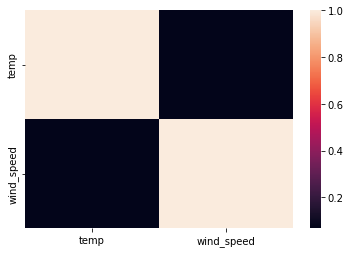

In [14]:
graphdf = (df_big.drop(['dt', 'city', 'id'], axis=1).copy())

corr = graphdf.corr()
sns.heatmap(corr)

#### This section crops down our df for gaphing in a bar plot

In [15]:
bar_graph = (df_big.drop(['dt','id'], axis=1).copy())

#### manchester info
* this section handles getting the average temp for manchester

In [16]:
manchester_bar = bar_graph.where(bar_graph['city'] == 'Manchester')
manchester_bar.dropna()
mancheser_mean = manchester_bar['temp'].mean()

#### Keen info
* this section handles getting the average temp for Keen

In [17]:
keen_bar = bar_graph.where(bar_graph['city'] == 'keen')
keen_bar.dropna()
keen_mean = keen_bar['temp'].mean()

#### concord info
* this section handles getting the average temp for concord

In [18]:
Concord_bar = bar_graph.where(bar_graph['city'] == 'Concord')
Concord_bar.dropna()
Concord_mean = Concord_bar['temp'].mean()

#### makeing a graphable df
* this section stiches together our averages and city names to make it graphable 

<AxesSubplot:xlabel='city', ylabel='average_temp'>

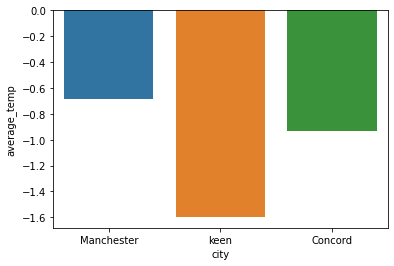

In [19]:
data = {'city': ['Manchester', 'keen', 'Concord'], 'average_temp': [mancheser_mean, keen_mean, Concord_mean]}

df = pd.DataFrame(data)

sns.barplot(x = 'city', y = 'average_temp', data=df)